In [71]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [72]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [73]:
%run prepro.ipynb

In [90]:

tf.keras.backend.clear_session()
model = tf.keras.Sequential(
    [
        tf.keras.layers.GaussianNoise(0.1, input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.SpatialDropout2D(0.4),
        tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.SpatialDropout2D(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNoi  (None, 28, 28, 1)        0         
 se)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 13, 13, 32)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                        

In [76]:
#tf.keras.utils.plot_model(model, show_shapes=True)

In [91]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=20,validation_split=0.2)

Epoch 1/20
90/90 [==============================] - 2s 19ms/step - loss: 1.0334 - accuracy: 0.6886 - val_loss: 0.8501 - val_accuracy: 0.7333
Epoch 2/20
90/90 [==============================] - 2s 17ms/step - loss: 0.4211 - accuracy: 0.8775 - val_loss: 0.4428 - val_accuracy: 0.8735
Epoch 3/20
90/90 [==============================] - 2s 17ms/step - loss: 0.2929 - accuracy: 0.9154 - val_loss: 0.3265 - val_accuracy: 0.9093
Epoch 4/20
90/90 [==============================] - 2s 17ms/step - loss: 0.2371 - accuracy: 0.9322 - val_loss: 0.2731 - val_accuracy: 0.9228
Epoch 5/20
90/90 [==============================] - 2s 17ms/step - loss: 0.1979 - accuracy: 0.9431 - val_loss: 0.2359 - val_accuracy: 0.9318
Epoch 6/20
90/90 [==============================] - 2s 17ms/step - loss: 0.1776 - accuracy: 0.9492 - val_loss: 0.2133 - val_accuracy: 0.9407
Epoch 7/20
90/90 [==============================] - 2s 17ms/step - loss: 0.1581 - accuracy: 0.9547 - val_loss: 0.1964 - val_accuracy: 0.9448
Epoch 8/20
90

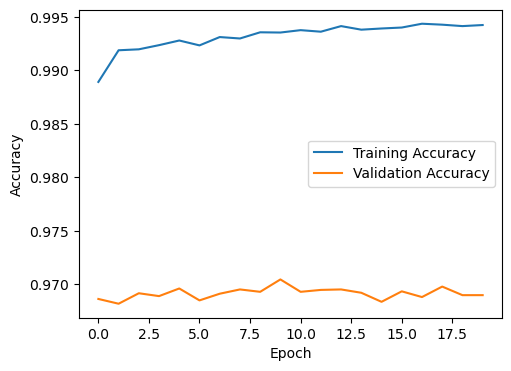

In [89]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [79]:
model.evaluate(x_test,y_test)

439/439 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9881


[0.04925597086548805, 0.988112211227417]

In [80]:
model.save('./model.keras')

In [81]:
#model2 = tf.keras.models.load_model('./model.keras')
#model2.evaluate(x_test,y_test)

In [82]:
encoder.inverse_transform(y_test)

array([[3],
       [4],
       [6],
       ...,
       [2],
       [3],
       [7]], dtype=int64)

In [83]:
prediction = encoder.inverse_transform(model.predict(x_test))


439/439 [==============================] - 1s 1ms/step


In [84]:
indices = np.where((prediction==encoder.inverse_transform(y_test))==False)[0]

In [ ]:
test_data.columns

In [ ]:
sub_prediction = model.predict(test_data.drop(columns=['id']).to_numpy().reshape(-1, 28, 28, 1)/255.0)
sub_prediction = encoder.inverse_transform(sub_prediction)
sub_prediction

In [ ]:
sub = pd.DataFrame.from_dict({'id':test_data.id, 'label':sub_prediction.ravel()})

In [ ]:
sub.to_csv("../resources/test_submission.csv",columns=["id","label"],index=False)